# PCA

PCA - Principal Component Analysis je nenadgledana procedura za smanjenje broja atributa. Novi atributi se zovu glavne komponente. Sam PCA nije algoritam klasifikacije, ali nakon primene PCA mozemo primenjivati druge algoritme. Zasto zelimo da smanjimo broj komponenti?
    - dobijamo na brzini
    - izbegavamo probleme koji nastaju kada imamo previse atributa - udaljenost u n-dimenzionim prostorima je poprilicno besmislena, jer je tesko odrediti sta je udaljeno od cega i po kom kriterijumu

Zamislimo primer da imamo 100 atributa, verovatno vecina njih nisu toliki bitno, npr. recimo da 2 atributa nose 70% informacija, 3 85%, 4 90% i tako dalje. PCA zeli da nadje tu optimalnu granicu da "presece"

Ideja je da znatno smanjimo broj atributa uz mininmalan gubitak preciznosti.

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
data = load_breast_cancer()

In [35]:
X = data['data']
y = data['target']
feature_names = data['feature_names']
class_names = data['target_names']

In [33]:
X.shape

(569, 30)

In [36]:
y.shape

(569,)

# BITNO!

Da bi uopste mogli da primenimo PCA, potrebno je skalirati podatke tkd svi atributui imaju prosek 0.
Takodje ako zelimo da primenimo neki klasifikacioni algoritam, prvo delimo skup na trening i test.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.decomposition import PCA

Za argument n_components mozemo da posaljemo:

    - int - koliko glavnih komponenti zelimo
    - float - koliki udeo varijanse zelimo da objasnimo

In [44]:
pca = PCA (n_components=0.95) # moglo je i 2

In [45]:
pca.fit(X_train)

,n_components,0.95
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [46]:
pca.components_.shape

(10, 30)

In [49]:
pca_names = [f'Principal_component_{i}' for i in range(len(pca.components_))]
pca_names

['Principal_component_0',
 'Principal_component_1',
 'Principal_component_2',
 'Principal_component_3',
 'Principal_component_4',
 'Principal_component_5',
 'Principal_component_6',
 'Principal_component_7',
 'Principal_component_8',
 'Principal_component_9']

In [50]:
for i, component in enumerate(pca.components_):
    print(f'{pca_names[i]} = ', end='')
    print(' + '.join(f'{coef:.2f}*{feature_name}'
                     for coef, feature_name in zip(component, feature_names)))
    print('-'*80)

Principal_component_0 = 0.22*mean radius + 0.10*mean texture + 0.23*mean perimeter + 0.22*mean area + 0.14*mean smoothness + 0.24*mean compactness + 0.26*mean concavity + 0.26*mean concave points + 0.14*mean symmetry + 0.06*mean fractal dimension + 0.20*radius error + -0.00*texture error + 0.21*perimeter error + 0.20*area error + -0.01*smoothness error + 0.16*compactness error + 0.15*concavity error + 0.18*concave points error + 0.05*symmetry error + 0.09*fractal dimension error + 0.23*worst radius + 0.10*worst texture + 0.24*worst perimeter + 0.23*worst area + 0.12*worst smoothness + 0.21*worst compactness + 0.23*worst concavity + 0.25*worst concave points + 0.13*worst symmetry + 0.13*worst fractal dimension
--------------------------------------------------------------------------------
Principal_component_1 = -0.23*mean radius + -0.07*mean texture + -0.21*mean perimeter + -0.23*mean area + 0.18*mean smoothness + 0.15*mean compactness + 0.07*mean concavity + -0.03*mean concave points

In [52]:
import matplotlib.pyplot as plt

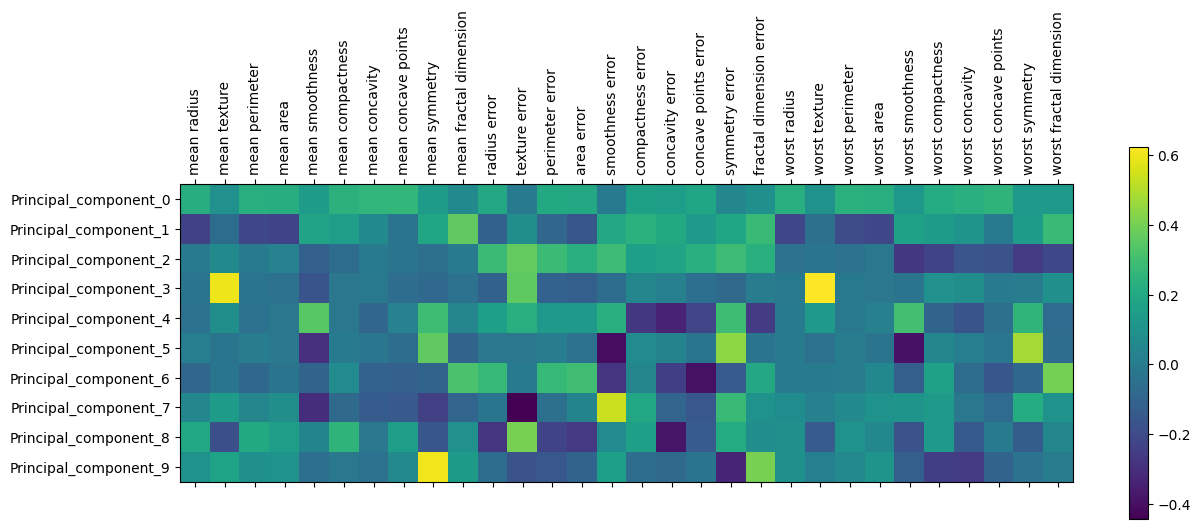

In [53]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
           labels=feature_names,
           rotation='vertical')
plt.yticks(ticks=range(pca.n_components_),
           labels=pca_names)
plt.colorbar()
plt.show()

In [54]:
pca.explained_variance_

array([13.19960138,  5.86946172,  2.82876863,  2.04220922,  1.6775402 ,
        1.20585692,  0.65714239,  0.47075049,  0.37406275,  0.35009583])

In [55]:
pca.explained_variance_ratio_

array([0.43895388, 0.19518945, 0.09407094, 0.06791384, 0.05578674,
       0.04010088, 0.02185333, 0.01565485, 0.01243949, 0.01164247])

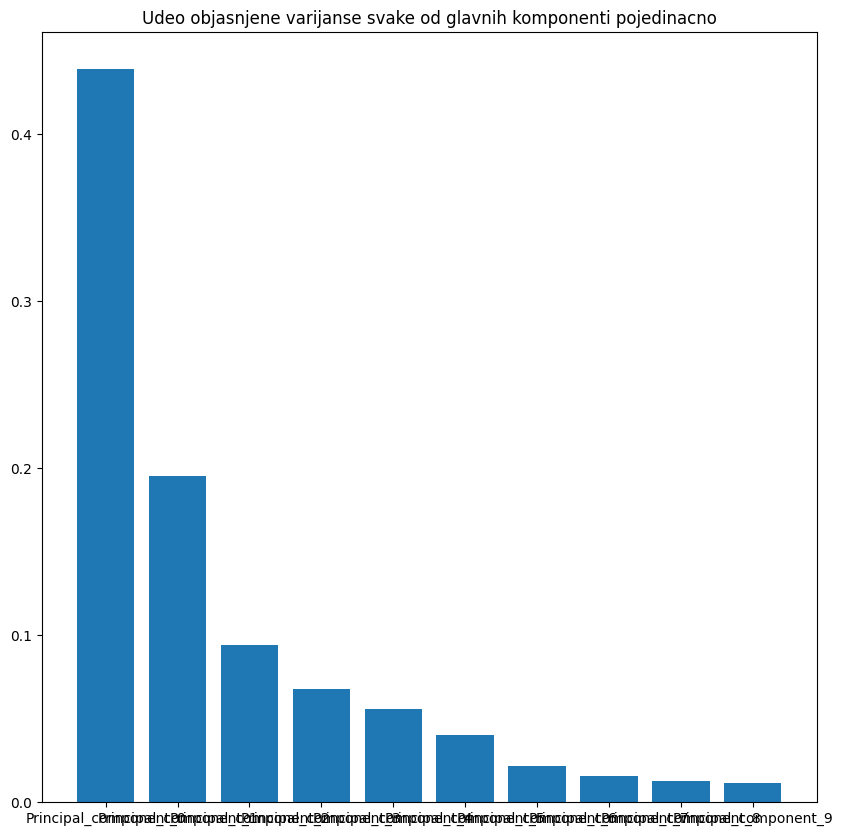

In [57]:
plt.figure(figsize=(10,10))
plt.bar(x=pca_names,
        height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse svake od glavnih komponenti pojedinacno')
plt.show()

In [59]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

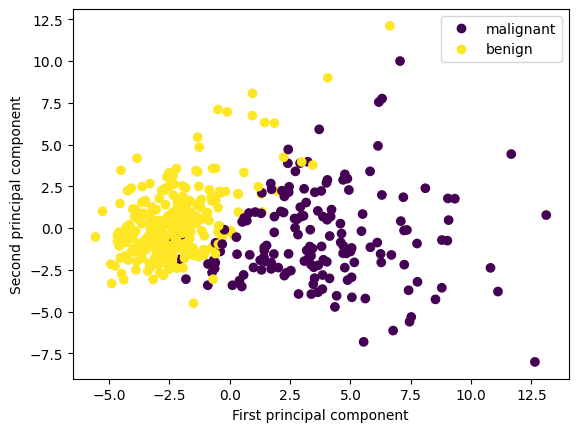

In [60]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()

# Ipak nije svemoguce
Kako je svaka glavna komponenta linearna kombinacija polaznih atributa i medjusobno su ortogonalne, na ovaj nacin redukujemo polazni visokodimenzioni prostor na linearni potprostor. Dakle, sustinska dimenzionalnost nasih podataka moze biti manja od one koju pronadjemo koriscenjem PCA jer ce nam on uvek dati linearan potprostor.

Npr. podaci mogu da se nalaze na povrsini sfere, sto je dvodimenziono, ali PCA ne moze da nadje 2d potprostor.

In [62]:
import numpy as np

In [63]:
r = 1
n = 25
phis = np.linspace(0, 180, num=n)
thetas = np.linspace(0, 360, num=n)
x = r * np.outer(np.sin(phis), np.cos(thetas))
y = r * np.outer(np.sin(phis), np.sin(thetas))
z = r * np.outer(np.cos(phis), np.ones(n))

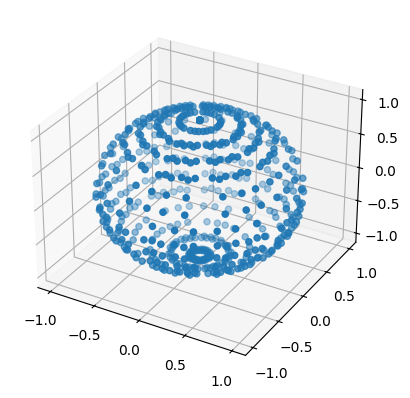

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
plt.show()

In [68]:
data = np.concatenate((x.reshape(-1,1), y.reshape(-1,1), z.reshape(-1,1)), axis=1)
data.shape

(625, 3)

In [69]:
pca = PCA()

In [70]:
pca.fit(data)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [71]:
pca.explained_variance_ratio_

array([0.51059861, 0.25844352, 0.23095788])